In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from models import Model

/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../../transformed_data/cleaned_saugeenday.csv')
df['ts'] = pd.to_datetime(df['ts'])
df.rename(columns={"series_value": "y"}, inplace=True)
print("Length of the df: ", len(df))

Length of the df:  23741


713


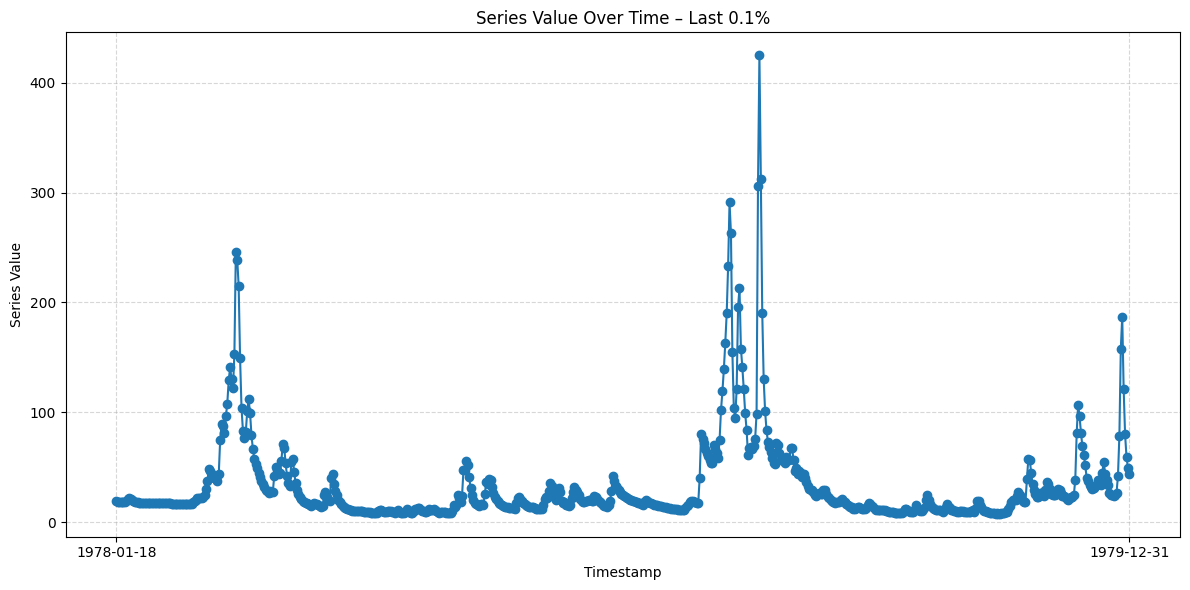

In [4]:
df_short = df[int(len(df) * 0.97):]
print(len(df_short))

start = df_short['ts'].min()
end = df_short['ts'].max()


plt.figure(figsize=(12, 6))
plt.plot(df_short['ts'], df_short['y'], marker='o')

# Start and End-Ticks
plt.xticks([start, end], [start.strftime('%Y-%m-%d'), end.strftime('%Y-%m-%d')])

plt.xlabel('Timestamp')
plt.ylabel('Series Value')
plt.title('Series Value Over Time – Last 0.1%')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:
df = df.tail(10000).copy()
split_idx   = int(len(df) * 0.8)

df_train = df.iloc[:split_idx].copy().reset_index(drop=True)
df_test  = df.iloc[split_idx:].copy().reset_index(drop=True)

In [6]:
print("Duplicates:", df.duplicated().sum())
print("NaNs:\n", df.isna().sum())
print("Frequency check:", df.diff().dropna().value_counts().head())

Duplicates: 0
NaNs:
 ts    0
y     0
dtype: int64
Frequency check: ts      y   
1 days   0.0    1058
        -0.5     308
        -0.3     240
        -0.2     187
        -0.1     174
Name: count, dtype: int64


In [7]:
model = Model(df=df)

⚠️  Non-30-min gaps found:
ts
1 days    9999
Name: count, dtype: int64


# Baseline

In [8]:
baseline = model.base_line()

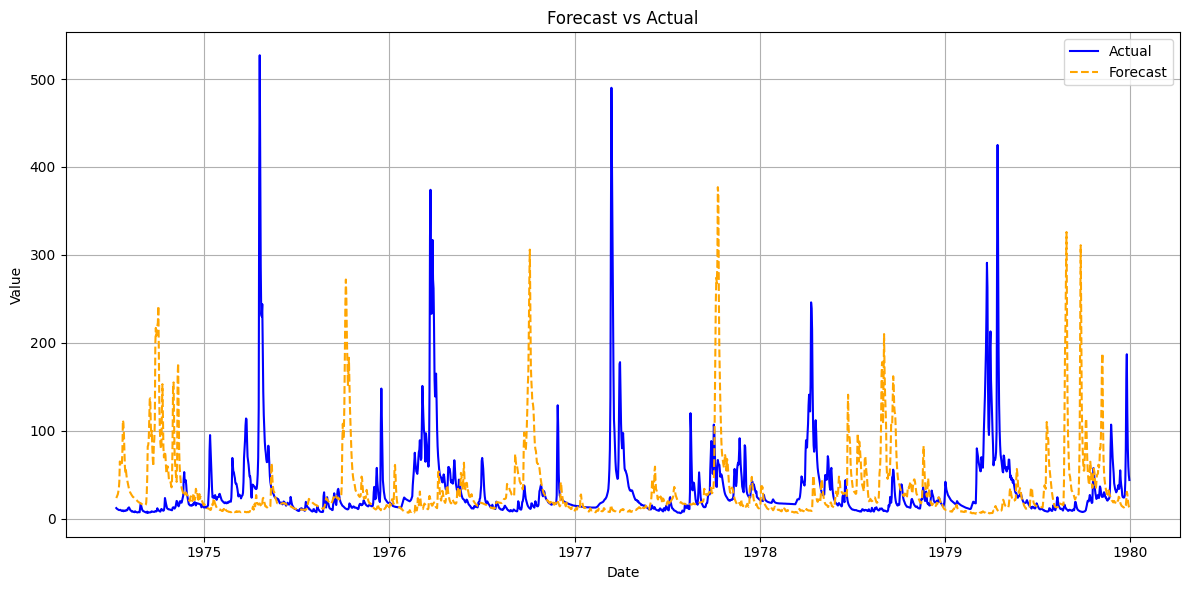

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(baseline['ts'], baseline['yhat'], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# LSTM

In [10]:
lstm_model = model.LSTM()

Epoch 1/50


/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df)
/Users/kseniablokhina/Downloads/TSF-SS25-TimeGPT/skripts/forecasting/models.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df)
/Users/kseniablokhina/Library/Caches/pypoetry/virtualenvs/tsf-ss25-timegpt-vRbsAJxS-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.p

200/200 - 2s - 10ms/step - loss: 0.0066 - mae: 0.0470 - val_loss: 0.0064 - val_mae: 0.0392
Epoch 2/50
200/200 - 1s - 5ms/step - loss: 0.0042 - mae: 0.0333 - val_loss: 0.0045 - val_mae: 0.0328
Epoch 3/50
200/200 - 1s - 5ms/step - loss: 0.0030 - mae: 0.0267 - val_loss: 0.0032 - val_mae: 0.0271
Epoch 4/50
200/200 - 1s - 5ms/step - loss: 0.0024 - mae: 0.0229 - val_loss: 0.0024 - val_mae: 0.0253
Epoch 5/50
200/200 - 1s - 5ms/step - loss: 0.0019 - mae: 0.0204 - val_loss: 0.0018 - val_mae: 0.0225
Epoch 6/50
200/200 - 1s - 5ms/step - loss: 0.0015 - mae: 0.0180 - val_loss: 0.0014 - val_mae: 0.0144
Epoch 7/50
200/200 - 1s - 5ms/step - loss: 0.0012 - mae: 0.0165 - val_loss: 0.0012 - val_mae: 0.0131
Epoch 8/50
200/200 - 1s - 5ms/step - loss: 9.9512e-04 - mae: 0.0150 - val_loss: 0.0010 - val_mae: 0.0131
Epoch 9/50
200/200 - 1s - 5ms/step - loss: 8.5890e-04 - mae: 0.0137 - val_loss: 9.3753e-04 - val_mae: 0.0143
Epoch 10/50
200/200 - 1s - 5ms/step - loss: 8.0484e-04 - mae: 0.0137 - val_loss: 8.0781e-

In [11]:
lstm_model

,ts,yhat
0,1974-08-04,13.044904
1,1974-08-05,12.476595
2,1974-08-06,13.418031
3,1974-08-07,11.286275
4,1974-08-08,10.037786
...,...,...
1971,1979-12-27,175.202916
1972,1979-12-28,83.471246
1973,1979-12-29,70.706382
1974,1979-12-30,53.382596


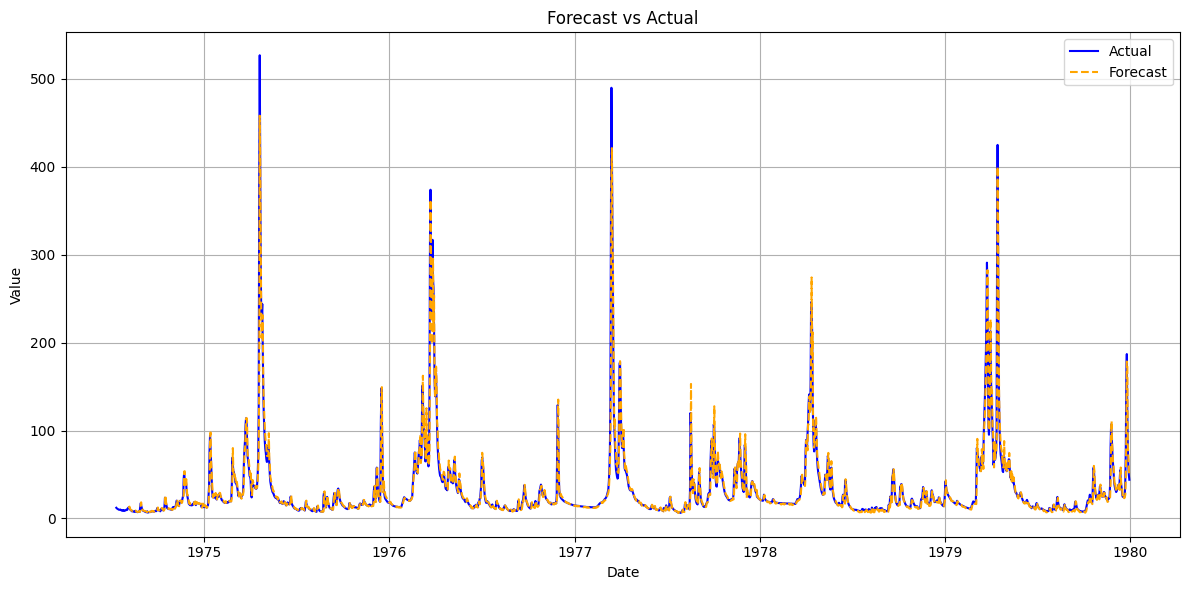

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(lstm_model['ts'], lstm_model["yhat"], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# TimeFM

In [22]:
timefm = model.times_fm("D")

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 70374.23it/s]
INFO:root:Loading checkpoint from /Users/kseniablokhina/.cache/huggingface/hub/models--google--timesfm-2.0-500m-pytorch/snapshots/dc2443792ce5516872b89b37cf1bc058c3bf0c10/torch_model.ckpt
INFO:root:Sending checkpoint to device cpu
INFO:root:Preprocessing dataframe.


Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.18 (main, Jul  1 2025, 11:02:31) [Clang 17.0.0 (clang-1700.0.13.5)].
Finished preprocessing dataframe.


INFO:root:Finished creating output dataframe.


Finished forecasting.


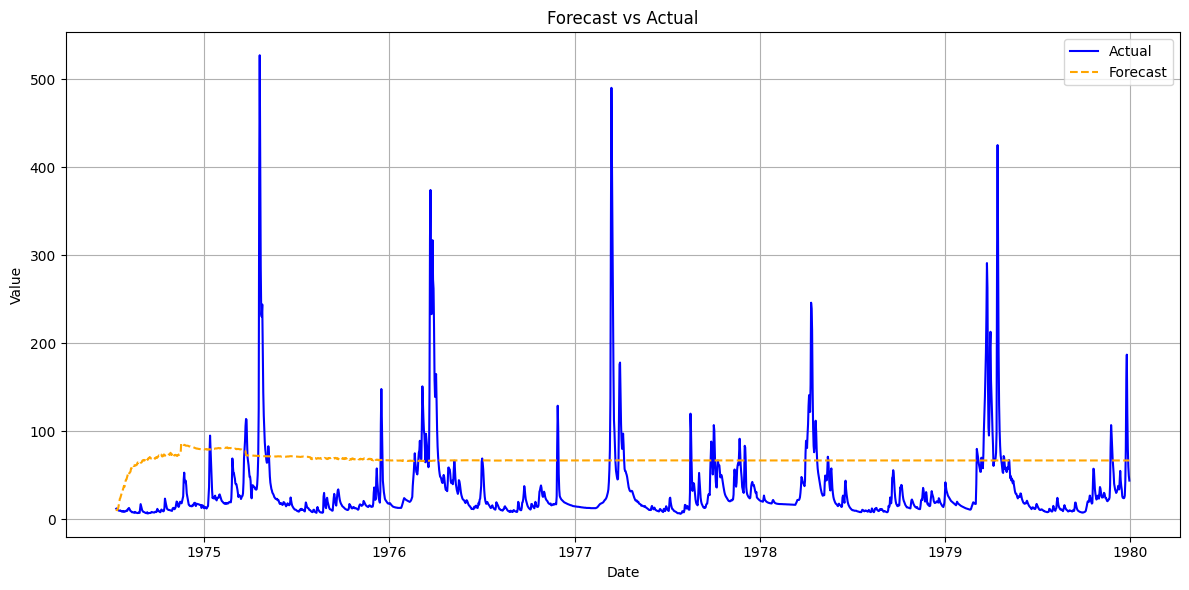

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_test['ts'], df_test['y'], label='Actual', color='blue')
plt.plot(timefm['ts'], timefm['yhat'], label='Forecast', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()